# Fashion Mnist



> **Citation** : Zalando Research - Fashion MNIST dataset


> Dataset : https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=train-labels-idx1-ubyte




In [2]:
# Importing Libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
zalando_research_fashionmnist_path = kagglehub.dataset_download('zalando-research/fashionmnist')

print('Data source import complete.')


Data source import complete.


In [5]:
# Directory & files
import os

# train_df = zalando_research_fashionmnist_path

for dirname , _ , filenames in os.walk(zalando_research_fashionmnist_path):
  for filename in filenames :
    print(os.path.join(dirname , filename))

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [6]:
# Loading Dataset
# train dataset
train_df = pd.read_csv(f"{zalando_research_fashionmnist_path}/fashion-mnist_train.csv")

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.info(memory_usage= "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [8]:
# test dataset
test_df = pd.read_csv(f"{zalando_research_fashionmnist_path}/fashion-mnist_test.csv")

test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


### Label

---

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot








In [10]:
# Label Data
label_data = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag" , "Ankle boot"]

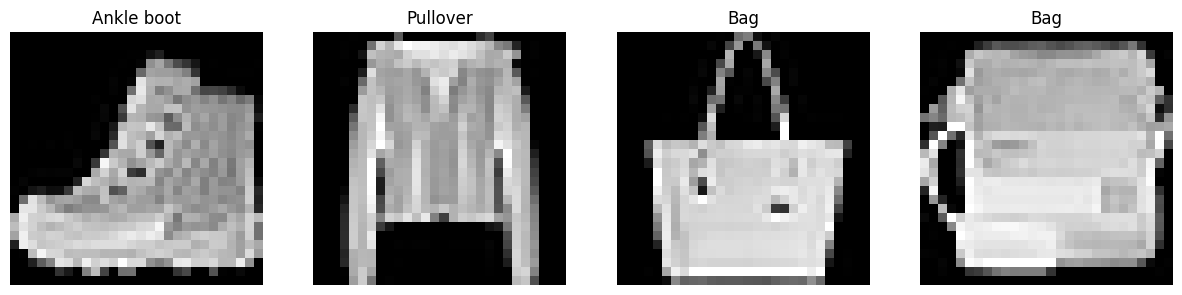

In [11]:
# preview data
preview = train_df.drop("label" , axis = 1)

plt.figure(figsize = (15 ,10))
for i in range(1 ,5):
  random_label = random.randint( 0 ,len(train_df)-1)
  image = np.array(preview.iloc[random_label , :]).reshape(28 , 28)

  plt.subplot(1 , 4 , i)
  plt.imshow(image , cmap = "gray")
  plt.title(label_data[train_df.iloc[random_label , 0]])
  plt.axis("off")
plt.show()

In [12]:
# Train , Validation , Test
train_data , valid_data = np.split(train_df.sample(frac = 1) , [int(0.8 * len(train_df))])

# Train
X_train , y_train = train_data.drop("label" , axis = 1).reset_index(drop = True) , train_data["label"].reset_index(drop = True)

# Valid
X_valid , y_valid = valid_data.drop("label" , axis = 1).reset_index(drop = True) , valid_data["label"].reset_index(drop = True)

# Test
X_test , y_test = test_df.drop("label" , axis = 1).reset_index(drop = True) , test_df["label"].reset_index(drop = True)

In [18]:
# Pixel Normalization
def normalize_pixel(data):
  return data / 255

In [17]:
# Hyperparameter Tuning
def model_creation(units , epochs , batches ,lr ):

  # Model
  model = keras.models.Sequential([
      keras.layers.Dense(units , input_shape = (784,) , activation = "relu"),
      keras.layers.Dense(units , activation = "relu"),
      keras.layers.Dense(units = 10  , activation = "softmax")
  ])

  # Compile

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr) ,
                loss = keras.losses.sparse_categorical_crossentropy ,
                metrics = ["accuracy"]
                )

  # Model Training
  history = model.fit(normalize_pixel(X_train) ,
                      y_train ,
                      epochs = epochs ,
                      batch_size = batches,
                      validation_split = 0.2 ,
                      verbose = 1)

  return model , history

In [19]:
# Model evaluation
least_val_loss = float("inf")
least_model = None


for units in [64 , 128 , 256 , 512]:
  for epochs in [5 , 10 , 15]:
    for batches in [128 , 256]:
      for lr in [0.01 , 0.001]:

        print("\n======================================================")
        print(f"{units} units , {epochs} epochs , {batches} batches , {lr} lr")
        print("======================================================\n")

        model , history = model_creation(units , epochs , batches , lr )

        val_loss , val_accuracy = model.evaluate(normalize_pixel(X_valid) , y_valid , verbose = 0)

        print("\n===========================================================================")
        print(f"Validation Loss : {val_loss} , Validation Accuracy : {val_accuracy}")
        print("=============================================================================\n")

        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_model = model


64 units , 5 epochs , 128 batches , 0.01 lr

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7061 - loss: 0.8108 - val_accuracy: 0.8330 - val_loss: 0.4806
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8472 - loss: 0.4243 - val_accuracy: 0.8374 - val_loss: 0.4390
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8534 - loss: 0.3959 - val_accuracy: 0.8519 - val_loss: 0.4164
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8606 - loss: 0.3818 - val_accuracy: 0.8608 - val_loss: 0.3848
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8685 - loss: 0.3589 - val_accuracy: 0.8635 - val_loss: 0.3751

Validation Loss : 0.3780292868614197 , Validation Accuracy : 0.8640000224113464


64 units , 5 epochs , 128 batches , 0.001 lr

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6916 - loss: 0.9460 - val_accuracy: 0.8274 - val_loss: 0.4813
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 

In [20]:
# choosen model
model = least_model

In [21]:
# Model Summary
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807,968 (3.08 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,646 (2.05 MB)

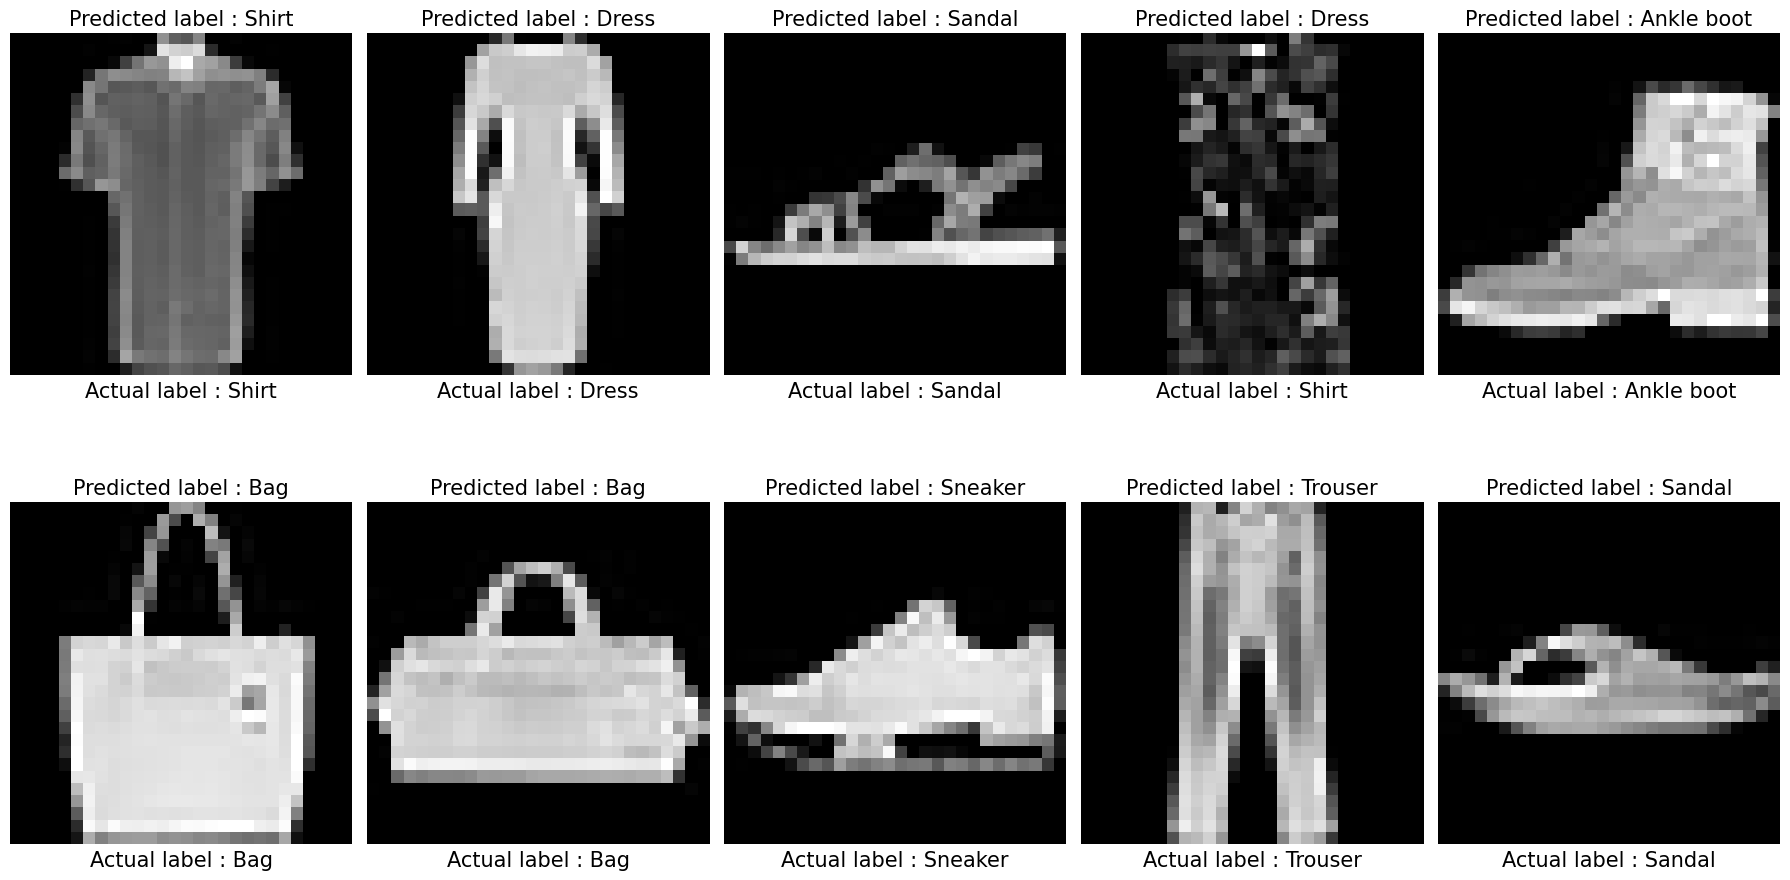

In [31]:
# Prediction
plt.figure(figsize = (18 , 12))
for i in range(1 , 11):
  rand_idx = random.randint(0 , len(test_df)-1) # random index
  y_pred_prob = model.predict(normalize_pixel(X_test.iloc[[rand_idx]]) , verbose = 0 ) # prediction
  y_pred_label = np.argmax(y_pred_prob) # predicted label
  y_actual_label = y_test[[rand_idx]].values[0] # actual y -- label

  # Predicted Image Plotting
  plt.subplot(2 , 5 , i)
  image = np.array(X_test.iloc[rand_idx , :]).reshape(28 , 28)
  plt.imshow(image , cmap = "gray")
  plt.title(f"Predicted label : {label_data[y_pred_label]}" , size = "15")
  plt.xlabel(f"Actual label : {label_data[y_actual_label]}" , size = "15")

  # Axis Removal
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['left'].set_visible(False)
  plt.gca().spines['bottom'].set_visible(False)
  plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
  plt.tight_layout()

plt.show()